# Assignment 20: NEURAL WORD EMBEDDINGS

1. Refer to the code mentioned on pages: 182-195 of this BOOK http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf

2. Repeat the same code while adding code comments. 
3. Train the GLOVE based model with 8000 samples instead of 200. 
4. Submit on GitHub and share the link. 
5. Mention your results along with your training and validation charts on the ReadMe page.


---
**Word Embedding** => Collective term for models that learned to map a set of words or phrases in a vocabulary to vectors of numerical values.


# Training the model without pretrained word embeddings

### Loading the IMDB data for use with an Embedding layer

In [0]:
from keras.datasets import imdb
from keras import preprocessing

# number of words to consider as features
max_features = 10000

# cuts off the text after 20 number of words
maxlen = 20

# loads the data as lists of integer
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

### Using an Embedding layer and classifier on the IMDB data

In [0]:
# The embedding layer 
from keras.layers import Embedding
# the embedding layer take at least two arguments: the number of possible tokens (here, 1000: 1 + max word index) and the dimensionality of the embeddings (here, 64).
embedding_layer = Embedding(1000, 64)

In [65]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# specifies the max input length to the Embedding layer so you can later flatten the embedded inputs. 
# After the Embedding layer, the activations have shape (samples, maxlen, 8).
model.add(Embedding(10000, 8, input_length=maxlen))

# flattens the 3D tensor of embeddings into a 2D tensor of shape (Samples, maxlen*8)
model.add(Flatten())

# adds the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 20, 8)             80000     
_________________________________________________________________
flatten_10 (Flatten)         (None, 160)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 125us/step - loss: 0.6631 - acc: 0.6330 - val_loss: 0.6071 - val_acc: 0.6972
Epoch 2/10
20000/20000 [==============================] - 2s 105us/step - loss: 0.5309 - acc: 0.7542 - val_loss: 0.5202 - val_acc: 0.7352
Epoch 3/10
20000/20000 [==============================

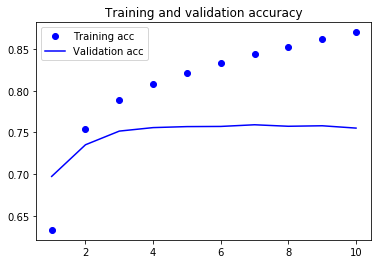

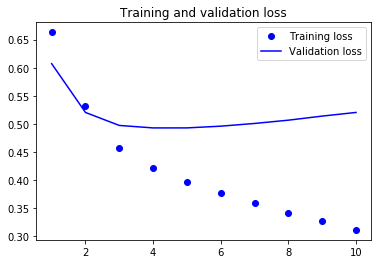

In [66]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#  Using pretrained word embeddings 


### Downloading the IMDB data as raw text and uncompress it
Download Link: http://mng.nz/0tIo



In [0]:
!wget 'http://s3.amazonaws.com/text-datasets/aclImdb.zip'
!unzip -q "/content/aclImdb.zip"

--2020-01-20 16:01:43--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.138.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.138.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘aclImdb.zip’

aclImdb.zip         100%[===================>]  57.90M  76.1MB/s    in 0.8s    

2020-01-20 16:01:44 (76.1 MB/s) - ‘aclImdb.zip’ saved [60711700/60711700]



###  Collect the individual training reviews into a list of strings, one string per review. You’ll also collect the review labels (positive/negative) into a labels list. 

In [0]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

### Tokenizing the text of the raw IMDB data
Vectorize the text and prepare a training and validation split

In [52]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # Cuts off reviews after 100 words
training_samples = 200 # Train only on 200 samples
validation_samples = 10000 # Validates on 10,000 samples
max_words = 10000 # Considers only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splits the data into a training set and a validation set, but first shuffles 
# the data because you're starting with data in which samples are ordered
# (all negatives first, then all positives).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


### Download the Glove word embeddings
**GloVe: Global Vectors for Word Representation**
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

They provided various models from 25, 50, 100, 200 to 300 dimensions based on 2, 6, 42, 840 billion tokens.


1. Go to https://nlp.stanford.edu/projects/glove, and download the precomputed embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or nonword tokens). Unzip it. 

2. Parse the unzipped file (a .txt file) to build an index that maps words (as strings) to their vector representation (as number vectors).

In [0]:
!wget "http://nlp.stanford.edu/data/glove.6B.zip"
!unzip -q "/content/glove.6B.zip" -O "glove.6B"

In [53]:
glove_dir = '/content/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [0]:
# Preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # words not found in the embedding index will all be zeros
      embedding_matrix[i] = embedding_vector

In [57]:
# model definition
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# TRAINING AND EVALUATING THE MODEL
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs = 10,
                    batch_size=32,
                    validation_data=(x_val, y_val)
                    )
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 3.5359 - acc: 0.6050 - val_loss: 7.8880 - val_acc: 0.5032
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 4.3412 - acc: 0.5900 - val_loss: 0.9617 - val_acc: 0.5042
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4267 - acc: 0.7950 - val_loss: 1.8227 - val_acc: 0.5032
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4662 - acc: 0.7800 - val_loss: 0.8093 - val_acc: 0.5070
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1407 - acc: 0.9850 - val_loss: 1.1211 - val_acc: 0.4962
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2745 - acc: 0.9000 - val_loss: 0.8536 - val_acc: 0.5032
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0403 - acc: 1.0000 - val_loss: 1.0632 - val_acc: 0.5045
Epoch 8/10
200/200 [========

###  Plotting the results

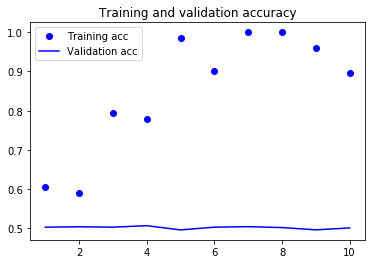

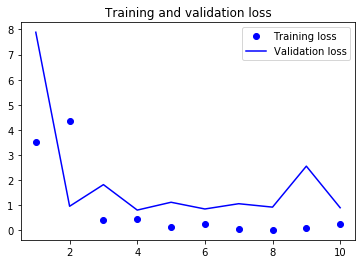

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Train the GLOVE based model with 8000 samples instead of 200. 

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 205us/step - loss: 0.7108 - acc: 0.5040

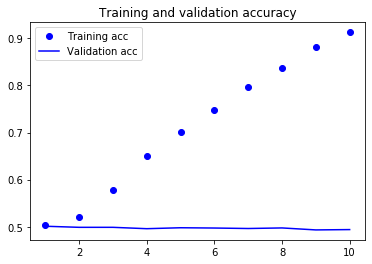

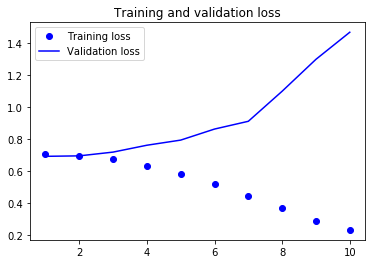

In [62]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # Cuts off reviews after 100 words
training_samples = 8000 # Train only on 200 samples
validation_samples = 10000 # Validates on 10,000 samples
max_words = 10000 # Considers only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splits the data into a training set and a validation set, but first shuffles 
# the data because you're starting with data in which samples are ordered
# (all negatives first, then all positives).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

###################################
# model definition
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

###################################

# Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

###################################

# TRAINING AND EVALUATING THE MODEL
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs = 10,
                    batch_size=32,
                    validation_data=(x_val, y_val)
                    )
model.save_weights('pre_trained_glove_model_800_Samples.h5')

###################################

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
###################################